### UST without arbitrage
##### Continuous-Time Representation

This first simulation is just a standard crypto curencie with market volatility (fluctuation).

The price dynamics in continuous time can be expressed as a stochastic differential equation:

$$
\frac{dP}{dt} = \sigma P \, \eta(t)
$$

**Where:**
- **$P$** is the price of the cryptocurrency.
- **$\sigma$** is the volatility coefficient.
- **$\eta(t)$** represents a random noise process (e.g., white noise).

##### Discrete-Time Simulation

For simulation purposes, we use a discrete-time version of the model:

$$
P[t] = P[t-1] \times (1 + \epsilon[t])
$$

Where:
- **$P_t$** is the price at time step $t$.
- **$P_{t-1}$** is the price at the previous time step.
- **$\epsilon_t$** is a random percentage change, typically drawn from a normal distribution, i.e.,

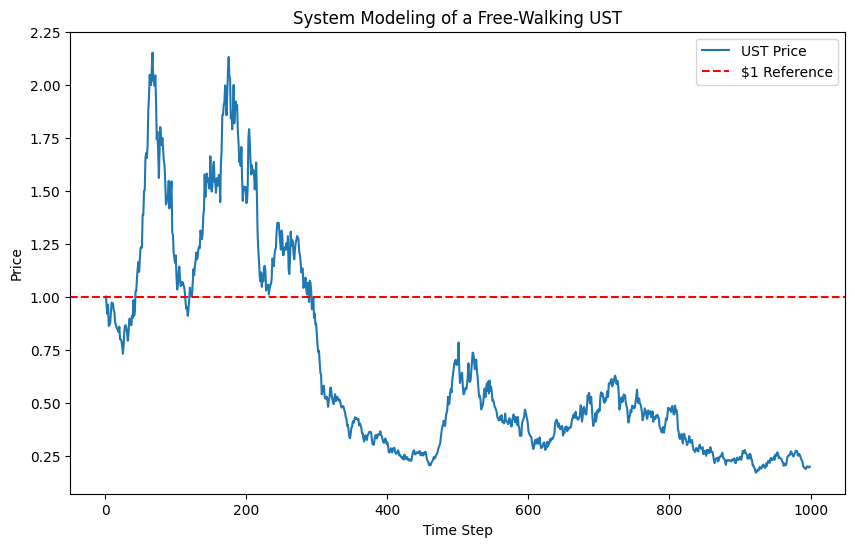

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1000                   # Number of time steps
price = np.zeros(T)        # Array to store UST price at each time step
price[0] = 1.0             # Starting price for UST
volatility = 0.05          # Volatility factor (5% standard deviation per time step)

# Simulate price evolution as a free-walking cryptocurrency
for t in range(1, T):
    pct_change = np.random.normal(0, volatility)    # Random percentage change
    price[t] = price[t-1] * (1 + pct_change)        # discrete-time equation

# Plot the results with a reference line at $1
plt.figure(figsize=(10, 6))
plt.plot(price, label='UST Price')
plt.axhline(1.0, color='red', linestyle='--', label='$1 Reference')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.title('System Modeling of a Free-Walking UST')
plt.legend()
plt.show()



### System Modeling of a Cryptocurrency with Supply Effects

Now we have introduced a market cap with a the supply of the coin
the market cap in $50 000, and with 1000 coins, each coin is worth $50 initialy.

The initial price of the coin is no longer hard set. Now it is a calculation of the Market cap divided by the supply:



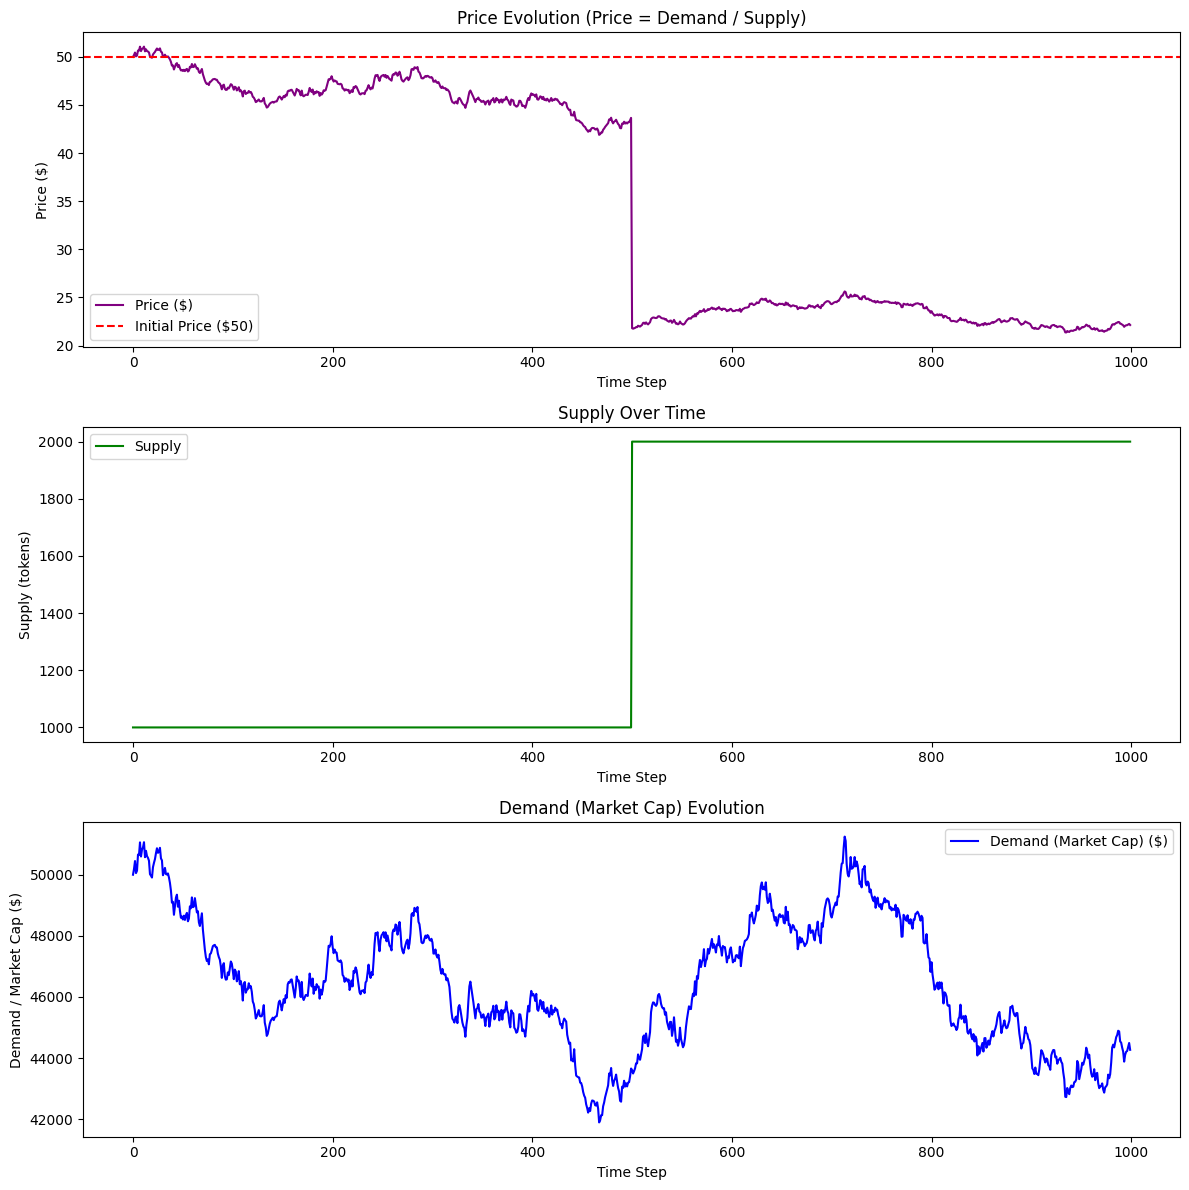

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1000                              # Total number of time steps
volatility = 0.005                    # Volatility factor for demand noise
demand = np.zeros(T)                  # Array for demand (i.e. market cap)
demand[0] = 50000.0                   # Initial demand of $50,000

# Supply parameters
initial_supply = 1000                 # Initial number of tokens
new_supply = 2000                     # Supply after the shock
shock_time = T // 2                   # Supply shock occurs halfway through
supply = np.full(T, initial_supply)   # Initialize supply array
supply[shock_time:] = new_supply      # Apply the supply shock

# Price is determined by Demand / Supply.
price = np.zeros(T)
price[0] = demand[0] / supply[0]      # Initial price = 50000 / 1000 = $50

# Simulate the evolution of demand (market cap) and compute price accordingly.
for t in range(1, T):
    epsilon = np.random.normal(0, volatility)
    demand[t] = demand[t-1] * (1 + epsilon)
    price[t] = demand[t] / supply[t]

# Plotting the results
plt.figure(figsize=(12, 12))

# Price Evolution Plot
plt.subplot(3, 1, 1)
plt.plot(price, label='Price ($)', color='purple')
plt.axhline(50, color='red', linestyle='--', label='Initial Price ($50)')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.title('Price Evolution (Price = Demand / Supply)')
plt.legend()

# Supply Plot
plt.subplot(3, 1, 2)
plt.plot(supply, label='Supply', color='green')
plt.xlabel('Time Step')
plt.ylabel('Supply (tokens)')
plt.title('Supply Over Time')
plt.legend()

# Demand (Market Cap) Plot
plt.subplot(3, 1, 3)
plt.plot(demand, label='Demand (Market Cap) ($)', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Demand / Market Cap ($)')
plt.title('Demand (Market Cap) Evolution')
plt.legend()

plt.tight_layout()
plt.show()
